In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [23]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [24]:
release_dates = pd.DataFrame.from_csv('release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

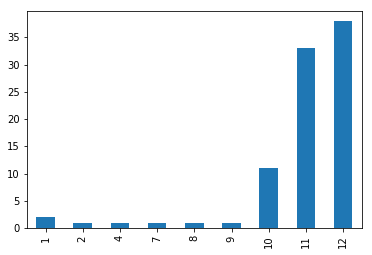

In [36]:
x = release_dates[(release_dates.title.str.find('Christmas') > 0) & (release_dates.country == 'USA')]
x = x.date.dt.month.value_counts().sort_index()
x.plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

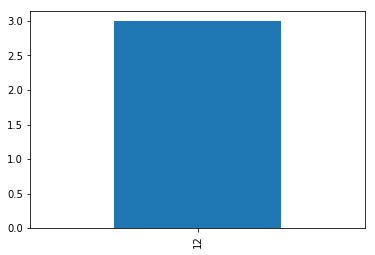

In [37]:
x = release_dates[(release_dates.title.str.startswith('The Hobbit')) & (release_dates.country == 'USA')]
x = x.date.dt.month.value_counts().sort_index()
x.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

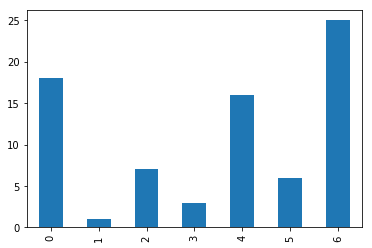

In [41]:
x = release_dates[(release_dates.title.str.find('Romance') > 0) & (release_dates.country == 'USA')]
x = x.date.dt.dayofweek.value_counts().sort_index()
x.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

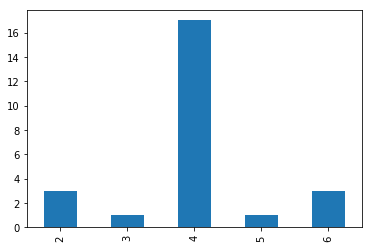

In [42]:
x = release_dates[(release_dates.title.str.find('Action') > 0) & (release_dates.country == 'USA')]
x = x.date.dt.dayofweek.value_counts().sort_index()
x.plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [53]:
j = cast[(cast.name == 'Judi Dench') & (cast.year//10 * 10 == 1990)]
j = j.merge(release_dates)
j = j[j.country == 'USA']
j[['title','date']]

,title,date
1,GoldenEye,1995-11-17
40,Hamlet,1996-12-25
71,Jack & Sarah,1996-03-22
78,Mrs Brown,1997-10-03
101,Shakespeare in Love,1999-01-08
147,Tea with Mussolini,1999-05-14
173,The World Is Not Enough,1999-11-19
246,Tomorrow Never Dies,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

In [59]:
j = cast[cast.name == 'Judi Dench']
j = j.merge(release_dates)
j = j.date.dt.month.value_counts()
j.head(1)

11    320
Name: date, dtype: int64

### In which months do films with Tom Cruise tend to be released in the USA?

In [61]:
j = cast[cast.name == 'Tom Cruise']
j = j.merge(release_dates)
j = j.date.dt.month.value_counts()
j.head(1)

1    195
Name: date, dtype: int64

Following along with the video from here:

In [4]:
r = release_dates
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [14]:
r.date.dt.month.head()

0     6
1     1
2     1
3     1
4    11
Name: date, dtype: int64

In [15]:
#merge
c = cast
c = c[c.name == 'Ellen Page']
c.merge(release_dates).head()

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08


Merge v/s join in Pandas:
Merge is the most general. Recommend using merge for everything
Dabble in join. Get good at one method before moving on to the others

#### Pivot function:
With the pivot, you can do the following three operations in one go:
 1. Set Index
 2. Sort Index
 3. Unstack

In [20]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title','country','date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,NaT,2019-05-24,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17
Star Wars: Episode VIII,2017-12-15,2017-12-15,NaT,NaT,NaT


In [22]:
c = cast
c = c[c.n <= 2]
c = c[c.name == 'Cary Grant']
c.head()

,title,year,name,type,character,n
840335,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
840336,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
840337,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
840339,Born to Be Bad,1934,Cary Grant,actor,Malcolm Trevor,2.0
840340,Bringing Up Baby,1938,Cary Grant,actor,David,2.0
